# Отображение результатов расчётов

In [1]:
# Импортируем numpy для хранения результатов расчётов
import numpy as np

# Импортируем модуль matplolib
import matplotlib.pyplot as plt

nx = 10
ny = 20
# dtype=[('p', np.float64), ('vx', np.float64) - имя переменной, тип переменной.
# Будем в узле хранить более одного значения.
data = np.zeros((ny, nx), dtype=[('p', np.float64), ('vx', np.float64)])
# Индексы
ix = 5
iy = 10
# Доступ к данным
data[iy, ix]['p'] = 13
data[iy, ix]['vx'] = 15
# Да, так тоже можно доступаться
#print(data['vx'])
# Модифицируем данные
for j in range(ny):
    for i in range(nx):
        data[j, i]['p'] = i + j
        data[j, i]['vx'] = -(i + j)

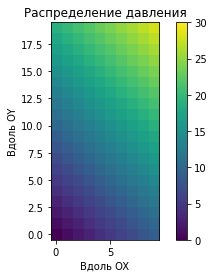

In [2]:
# Отображение 2Д данных цветом
fig, ax = plt.subplots()
ax.set_title('Распределение давления')
_ = ax.set_xlabel('Вдоль OX')
_ = ax.set_ylabel('Вдоль OY')
img = ax.imshow(data['p'], vmin = 0, vmax = 30, origin = 'lower')
_ = fig.colorbar(img)

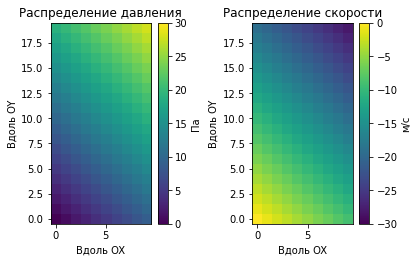

In [3]:
# Отображение двух разнородных данных
fig, axs = plt.subplots(1, 2)

axs[0].set_title('Распределение давления')
_ = axs[0].set_xlabel('Вдоль OX')
_ = axs[0].set_ylabel('Вдоль OY')
img_0 = axs[0].imshow(data['p'], vmin = 0, vmax = 30, origin = 'lower')
_ = fig.colorbar(img_0, label = 'Па', ax = axs[0])

axs[1].set_title('Распределение скорости')
_ = axs[1].set_xlabel('Вдоль OX')
_ = axs[1].set_ylabel('Вдоль OY')
img_1 = axs[1].imshow(data['vx'], vmin = -30, vmax = 0, origin = 'lower')
_ = fig.colorbar(img_1, label = 'м/с', ax = axs[1])
fig.tight_layout(pad = 2)

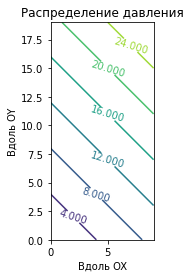

In [4]:
# Отображение 2Д данных в виде контуров
delta = 1.0
x = np.arange(0.0, 10.0, delta)
y = np.arange(0.0, 20.0, delta)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()
_ = plt.gca().set_aspect('equal')
CS = ax.contour(X, Y, data['p'])
ax.set_title('Распределение давления')
_ = ax.set_xlabel('Вдоль OX')
_ = ax.set_ylabel('Вдоль OY')
_ = ax.clabel(CS, inline=True, fontsize=10)

In [6]:
# Установка необходимых пакетов: conda install -n vtk -c conda-forge pyevtk
# https://github.com/paulo-herrera/PyEVTK (evtk->pyevtk + google and try)
# help(pyevtk.hl.imageToVTK)
from pyevtk.hl import imageToVTK

# Путь к файлу, куда сохраним результаты для просмотра в Paraview
FILE_PATH = "./exported_data"

# Задаём размеры сетки в количестве узлов вдоль направлений
ny, nx = data.shape
nz = 1
npoints = nx * ny * nz

# Описываем то, что хотим экспортировать
pressure = data['p'].copy(order = 'C').transpose().reshape((nx, ny, nz))
velocity = data['vx'].copy(order = 'C').transpose().reshape((nx, ny, nz))
# Данные, записываемые в узлы
_ = imageToVTK(FILE_PATH, origin = (10.0, 20.0, 0.0), spacing = (1.0, 1.0, 1.0), pointData = {"pressure" : pressure,
                                                                                              "velocity" : velocity})
# Данные, записываемые в ячейки
ncells = (nx - 1) * (ny - 1) * (nz)
density = np.random.rand(ncells).reshape((nx - 1, ny - 1, nz))
_ = imageToVTK('material', origin = (10.0, 20.0, 0.0), spacing = (1.0, 1.0, 1.0), cellData = {"density" : density})